## Linear regression

### Univariate

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing, linear_model

%matplotlib inline

In [29]:
# load population (x) and profit (y) data
data = np.loadtxt('data/ml-ex1/ex1data1.txt', delimiter=',')

In [30]:
# Separate feature (x) from target (y)
x, y = np.hsplit(data, 2)

In [31]:
# Number of samples
m = y.size

In [32]:
# Run linear regression
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# Obtain coefficients theta0 and theta1 from model
theta0, theta1 = model.intercept_, model.coef_[0]
theta0, theta1

(array([-3.89578088]), array([ 1.19303364]))

In [34]:
# Add coefficients to a vector (needed later for computing cost)
Theta = np.vstack([model.intercept_, model.coef_.T])

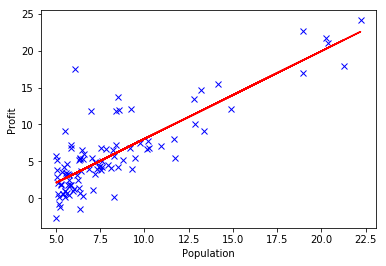

In [35]:
plt.plot(x, y, 'bx')
plt.plot(x, model.predict(x), 'r-')
plt.xlabel('Population')
plt.ylabel('Profit')

In [36]:
# Mean squared error (should use test data)
np.mean((model.predict(x) - y) ** 2)

8.9539427519503558

In [37]:
# Variance score (should use test data)
model.score(x, y)

0.70203155378413973

In [38]:
# Predict profit for populations of 35.000 and 70.000 
model.predict(np.array([[3.5], [7.0]])) * 10000

array([[  2798.36876352],
       [ 44554.54631015]])

See also [this Stackoverflow entry](https://stackoverflow.com/questions/34170618/normal-equation-and-numpy-least-squares-solve-methods-difference-in-regress) for the following calculations:

In [39]:
# Create design matrix X
X = np.c_[np.ones(m), x]

In [40]:
# Minimize the Euclidean 2-norm with np.linalg.lstsq. 
# This is what linear_model.LinearRegression uses under the hood.
Theta = np.linalg.lstsq(X, y)[0]
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [41]:
# Solve analytically (without explicit inverse)
Theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [42]:
# Solve normal equation (explicit inverse)
Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [43]:
# Solve normal equation (explicit pseudo-inverse)
Theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [44]:
# Cost function
def cost(X, y, Theta):
    M = X.dot(Theta) - y
    return 1 / y.size * (M.T.dot(M))

In [45]:
# Compute cost of solution
cost(X, y, Theta)

array([[ 8.95394275]])

### Multivariate

In [46]:
# Columns 
# - x1: house size in feet**2, 
# - x2: number of bedrooms, 
# - y:  house price
data = np.loadtxt('data/ml-ex1/ex1data2.txt', delimiter=',')

In [47]:
# separate features (x1, x2) from target (y)
x, y = np.hsplit(data, np.array([2]))

In [48]:
# Number of samples
m = y.size

In [49]:
# Scale features to standard deviation after substracting mean
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)

In [50]:
# Run linear regression
model = linear_model.LinearRegression()
model.fit(x_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# Obtain coefficients Theta from model
Theta = np.vstack([model.intercept_, model.coef_.T])
Theta

array([[ 340412.65957447],
       [ 109447.79646964],
       [  -6578.35485416]])

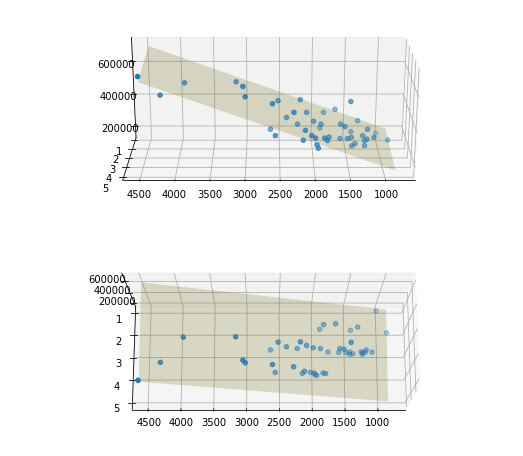

In [52]:
# Predict target y from non-scaled features x1 and x2
#def predict(x1, x2):
#    scaled = scaler.transform([[x1, x2]])
#    return model.predict(scaled)[0, 0]

# Vectorize predict
#predict_v = np.vectorize(predict)

# Create a meshgrid for feature min/max values and predict targets
grid_range = np.vstack([x.min(0), x.max(0)])
grid = np.meshgrid(grid_range[:,0], grid_range[:,1])

x_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
x_grid_scaled = scaler.transform(x_grid)
y_grid = model.predict(x_grid_scaled).reshape(grid[0].shape)

# Create new figure and double height
fig_x_rc, fig_y_rc = plt.rcParams['figure.figsize']
fig = plt.figure(2, figsize=[fig_x_rc * 1.5, fig_y_rc * 2])


def plot(fignum, angle):
    sp = fig.add_subplot(2, 1, fignum, projection='3d')
    sp.view_init(angle, 90)
    #
    #sp.set_xlabel('Square feet')
    #sp.set_ylabel('Bedrooms')
    #sp.set_zlabel('Price')
    #
    # Customize tick locators
    sp.yaxis.set_major_locator(ticker.MultipleLocator(1.00))
    sp.zaxis.set_major_locator(ticker.MultipleLocator(200000))
    # Plot samples
    sp.scatter(x[:,0], x[:,1], y)
    # Plot regression area
    sp.plot_surface(grid[0], grid[1], y_grid, color='y', alpha=0.2)
    
plot(1, 20)
plot(2, 75)

In [53]:
# Mean squared error (should use test data)
np.mean((model.predict(x_scaled) - y) ** 2)

4086560101.2056565

In [54]:
# Variance score (should use test data)
model.score(x_scaled, y)

0.73294501802891432

In [55]:
# Create design matrix X
X_scaled = np.c_[np.ones(m), x_scaled]

In [56]:
# Solve analytically (without explicit inverse)
Theta = np.linalg.solve(X_scaled.T.dot(X_scaled), X_scaled.T.dot(y))
Theta

array([[ 340412.65957447],
       [ 109447.79646964],
       [  -6578.35485416]])

In [57]:
# Solve normal equation (explicit pseudo-inverse)
Theta = np.linalg.pinv(X_scaled.T.dot(X_scaled)).dot(X_scaled.T).dot(y)
Theta

array([[ 340412.65957447],
       [ 109447.79646964],
       [  -6578.35485416]])

In [58]:
# Compute cost of solution
cost(X_scaled, y, Theta)

array([[  4.08656010e+09]])